## Data clean and preparation

In [6]:
data = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv'

In [7]:
!wget $data

--2025-11-02 21:01:37--  https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.2’

CreditScoring.csv.2 100%[===================>] 178.21K  93.9KB/s    in 1.9s    

2025-11-02 21:01:40 (93.9 KB/s) - ‘CreditScoring.csv.2’ saved [182489/182489]



In [8]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [9]:
!pip install pandas

In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('CreditScoring.csv')

In [12]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [13]:
df.columns = df.columns.str.lower()

In [14]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [15]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [16]:
status_values = {1:'ok',2:'default',0:'unk'}
df.status = df.status.map(status_values)

In [17]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [18]:
home_values = {
    1:"rent", 
    2:"owner", 
    3:"priv", 
    4:"ignore", 
    5:"parents", 
    6:"other",
    0:"unk"
}

marital_values = {
    1:"single", 
    2:"married", 
    3:"widow", 
    4:"separated", 
    5:"divorced",
    0:"unk"
}

records_values = {
    1:"no", 
    2:"yes",
    0:"unk"
}

job_values = {
    1:"fixed", 
    2:"partime", 
    3:"freelance", 
    4:"others",
    0:"unk"
}

In [19]:
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [20]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [21]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [22]:
for c in ['income','assets','debt']:
    df[c] = df[c].replace(to_replace=99999999,value=np.nan)


In [23]:
df = df[df.status !='unk'].reset_index(drop=True)

In [24]:
from sklearn.model_selection import train_test_split

df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=11)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=11)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
y_train = (df_train.status =='default').astype('int').values
y_val = (df_val.status =='default').astype('int').values
y_test = (df_test.status =='default').astype('int').values

In [27]:
del df_train['status']
del df_val['status']
del df_test['status']

In [28]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,priv,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,priv,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## Decision trees

In [29]:
def assess_risk(client):
    if client['records'] =='yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [30]:
xi = df_train.iloc[0].to_dict()

In [31]:
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [32]:
assess_risk(xi)

'ok'

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [34]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [35]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [36]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
val_dicts = df_val.fillna(0).to_dict(orient='records')

In [38]:
X_val = dv.transform(val_dicts)

In [39]:
y_pred = dt.predict_proba(X_val)[:,1]

In [40]:
roc_auc_score(y_val,y_pred)

0.6685264343319367

In [41]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

0.7054989859726213

In [42]:
y_pred = dt.predict_proba(X_train)[:,1]
train_score = roc_auc_score(y_train,y_pred)
print('train:',train_score)

y_pred = dt.predict_proba(X_val)[:,1]
val_score = roc_auc_score(y_val,y_pred)
print('val:',val_score)

train: 0.7054989859726213
val: 0.6685264343319367


In [43]:
from sklearn.tree import export_text

In [44]:
print(export_text(dt,feature_names=dv.get_feature_names_out().tolist()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



In [45]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=priv',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

## Decision tree learning algorithm

In [46]:
data = [
    [8000, 3000,'default'],
    [2000,1000, 'default'],
    [   0,1000, 'default'],
    [5000,1000, 'ok'],
    [5000,1000, 'ok'],
    [4000,1000, 'ok'],
    [9000, 500,'ok'],
    [3000,2000, 'default'],
]

In [47]:
df_example = pd.DataFrame(data,columns=['assets','debt','status'])

In [48]:
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [49]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [50]:
Ts = [500,1000,2000]

In [51]:
thresholds = {
    'assets':[0,2000,3000,4000,5000,8000],
    'debt':[500,1000,2000]
}

In [52]:
for feature,Ts in thresholds.items():
    print('#####################')
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <=T]
        df_right = df_example[df_example[feature] >T]
        
        display(df_left)
        print(df_left.status.value_counts(normalize=True))

        display(df_right)
        print(df_right.status.value_counts(normalize=True))


        print()
        print('#####################')

#####################
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

#####################
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

#####################
3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

#####################
4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

#####################
5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

#####################
8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

#####################
1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

#####################
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


In [53]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <=T]
    df_right = df_example[df_example.assets >T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))

    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    
    print()

500


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64



In [54]:
T = 4000
df_left = df_example[df_example.assets <=T]
df_right = df_example[df_example.assets >T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
print(df_right.status.value_counts(normalize=True))
display(df_right)

,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64
status
ok         0.75
default    0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


### Stopping criteria

- Group Already Pure
- Tree reached depth limit
- Group too small to split

- Find the best split
- Stop if max_depth is reached
- IF left is sufficiently large
    - And not pure:
        - Repeat for left
- If right is sufficiently large
    - And not pure:
        - Repeat for right

In [55]:
# Instal Elastic Beanstalk (awsebcli) 
!pipenv install awsebcli --dev

zsh:1: command not found: pipenv


In [56]:
# Activate the virtual environment with:
!pipenv shell

zsh:1: command not found: pipenv


In [57]:
# Initialize an Elastic Beanstalk application with the spcified options using:
!eb init -p docker -r eu-west-1 churn-serving

zsh:1: command not found: eb


In [58]:
# Running EB locally
!eb local run --port 9696

zsh:1: command not found: eb


In [59]:
# Test our locally running application by using the following command:
python PracticePredict-test.py

SyntaxError: invalid syntax (3616112457.py, line 2)

In [ ]:
# terminate the EB environment
!eb terminate churn-serving-env

## Decision trees parameter tuning

In [62]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 156.1 kB/s  0:00:57 eta 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 234.8 kB/s  0:00:12 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 245.6 kB/s  0:00:19 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m6/8 [matplotlib]


In [63]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


- selecting `max_depth`
- selecting `min_samples_leaf`

In [64]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    
    print('%4s -> %.3f' % (d,auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.758
  10 -> 0.694
  15 -> 0.653
  20 -> 0.654
None -> 0.664


In [65]:
scores = []

for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train,y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        scores.append((d,s,auc))

In [66]:
columns = ['max_depth','min_samples_leaf','auc']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [67]:
df_scores.sort_values(by='auc',ascending=False)

,max_depth,min_samples_leaf,auc
22,6,15,0.785080
21,6,10,0.778299
24,6,100,0.776434
14,5,20,0.774028
23,6,20,0.773634
13,5,15,0.772405
25,6,200,0.768267
11,5,5,0.768173
10,5,2,0.766938
19,6,2,0.766696


In [68]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',columns=['max_depth'],values=['auc'])

In [69]:
df_scores_pivot

auc                    
max_depth                4         5         6
min_samples_leaf                              
1                 0.761283  0.766496  0.757090
2                 0.761283  0.766938  0.766696
5                 0.761283  0.768173  0.762212
10                0.761283  0.762276  0.778299
15                0.763726  0.772405  0.785080
20                0.760910  0.774028  0.773634
100               0.755937  0.763384  0.776434
200               0.747260  0.759073  0.768267
500               0.679842  0.679842  0.679842

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

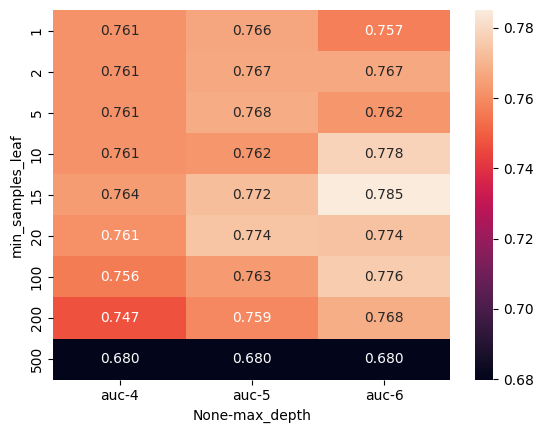

In [70]:
sns.heatmap(df_scores_pivot,annot=True,fmt='.3f')

In [71]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=20)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Ensemble Learning and Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
y_pred = rf.predict_proba(X_val)[:,1]

In [75]:
roc_auc_score(y_val,y_pred)

0.7729983531520186

In [76]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [77]:
scores = []
for n in range(10,200,10):
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train,y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    scores.append((n,auc))

In [78]:
df_scores = pd.DataFrame(scores,columns = ['n_estimators','auc'])

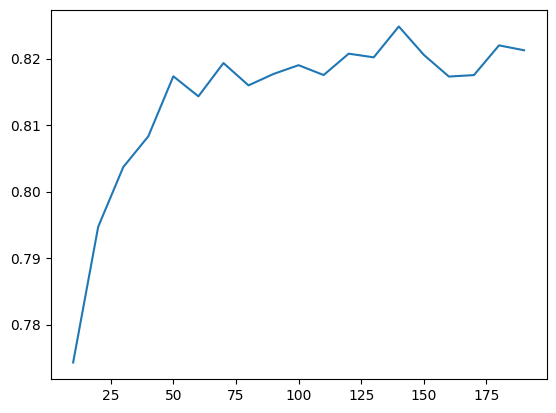

In [79]:
plt.figure(20.0)
plt.plot(df_scores.n_estimators,df_scores.auc)

In [80]:
scores = []

for d in [5,10,15]:
    for n in range(10,200,10):
        rf = RandomForestClassifier(n_estimators=n,
                                   max_depth = d,
                                   random_state=1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,n,auc))

In [81]:
columns = ['max_depth','n_estimator','auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimator,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


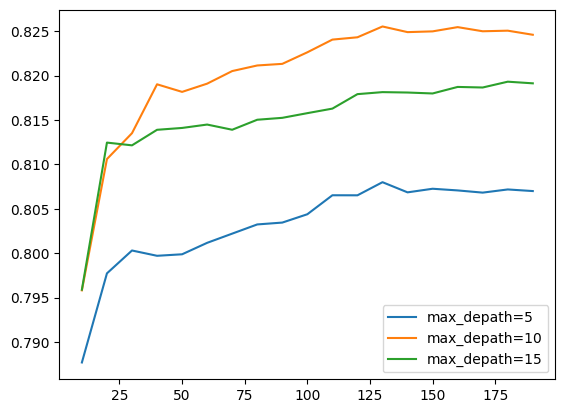

In [82]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth ==d]
    plt.plot(df_subset.n_estimator,df_subset.auc,
            label = 'max_depath=%d' % d)

    plt.legend()

In [83]:
max_depth = 10

In [84]:
scores = []

for s in [1,3,5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,
                                   max_depth = max_depth,
                                    min_samples_leaf=s,
                                   random_state=1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((s,n,auc))

In [85]:
columns = ['min_sample_leaf','n_estimator','auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_sample_leaf,n_estimator,auc
0,1,10,0.795818
1,1,20,0.810597
2,1,30,0.813510
3,1,40,0.819013
4,1,50,0.818160


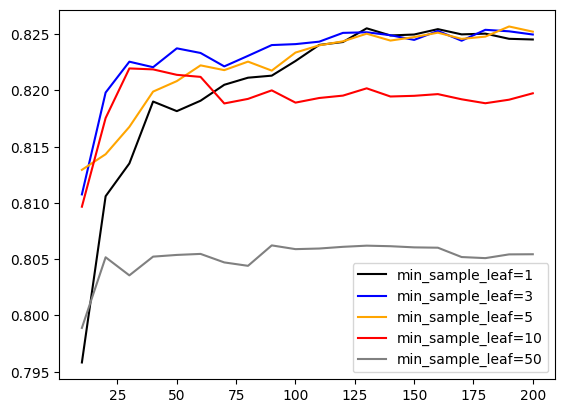

In [86]:
colors = ['black','blue','orange','red','grey']
min_sample_leaf_values = [1,3,5,10,50]
list(zip(min_sample_leaf_values,colors))


for s,col in zip(min_sample_leaf_values,colors):
    df_subset = df_scores[df_scores.min_sample_leaf ==s]
    plt.plot(df_subset.n_estimator,df_subset.auc,
            label = 'min_sample_leaf=%d' % s,
            color=col)

    plt.legend()

In [87]:
min_sample_leaf = 10

In [88]:
rf = RandomForestClassifier(n_estimators=n,
                                   max_depth = max_depth,
                                    min_samples_leaf=min_sample_leaf,
                                   random_state=1,
                           n_jobs=-1)
rf.fit(X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [89]:
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)

In [90]:
auc

0.819745828388753

## Gradient boosting vs. Random Forest

In [ ]:
!pip install xgboost

In [91]:
import xgboost as xgb

In [94]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train,label=y_train,feature_names = features)
dval = xgb.DMatrix(X_val,label=y_val,feature_names=features)

In [103]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [179]:
%%capture output

xgb_params = {
    'eta':0.1,
    'max_depth':4,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1,
    
}
model = xgb.train(xgb_params,dtrain,num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [164]:
print(output.stdout)

[0]	train-auc:0.91921	val-auc:0.77250
[5]	train-auc:0.96378	val-auc:0.78352
[10]	train-auc:0.97867	val-auc:0.79202
[15]	train-auc:0.98755	val-auc:0.80156
[20]	train-auc:0.99288	val-auc:0.79830
[25]	train-auc:0.99610	val-auc:0.79842
[30]	train-auc:0.99798	val-auc:0.80113
[35]	train-auc:0.99873	val-auc:0.80200
[40]	train-auc:0.99927	val-auc:0.80438
[45]	train-auc:0.99962	val-auc:0.80388
[50]	train-auc:0.99977	val-auc:0.80469
[55]	train-auc:0.99989	val-auc:0.80490
[60]	train-auc:0.99995	val-auc:0.80540
[65]	train-auc:0.99998	val-auc:0.80475
[70]	train-auc:0.99999	val-auc:0.80523
[75]	train-auc:0.99999	val-auc:0.80657
[80]	train-auc:1.00000	val-auc:0.80631
[85]	train-auc:1.00000	val-auc:0.80619
[90]	train-auc:1.00000	val-auc:0.80676
[95]	train-auc:1.00000	val-auc:0.80648
[100]	train-auc:1.00000	val-auc:0.80688
[105]	train-auc:1.00000	val-auc:0.80648
[110]	train-auc:1.00000	val-auc:0.80683
[115]	train-auc:1.00000	val-auc:0.80670
[120]	train-auc:1.00000	val-auc:0.80742
[125]	train-auc:1.0000

In [111]:
s = output.stdout

In [112]:
print(s)

[0]	train-auc:0.84318	val-auc:0.78156
[5]	train-auc:0.89477	val-auc:0.81306
[10]	train-auc:0.91041	val-auc:0.81977
[15]	train-auc:0.92307	val-auc:0.82574
[20]	train-auc:0.93223	val-auc:0.83016
[25]	train-auc:0.93952	val-auc:0.83011
[30]	train-auc:0.94540	val-auc:0.83068
[35]	train-auc:0.95015	val-auc:0.83066
[40]	train-auc:0.95291	val-auc:0.83161
[45]	train-auc:0.95676	val-auc:0.83083
[50]	train-auc:0.96083	val-auc:0.82872
[55]	train-auc:0.96346	val-auc:0.82869
[60]	train-auc:0.96601	val-auc:0.82685
[65]	train-auc:0.96934	val-auc:0.82427
[70]	train-auc:0.97167	val-auc:0.82420
[75]	train-auc:0.97436	val-auc:0.82120
[80]	train-auc:0.97718	val-auc:0.82021
[85]	train-auc:0.97911	val-auc:0.82000
[90]	train-auc:0.98064	val-auc:0.82028
[95]	train-auc:0.98264	val-auc:0.81999
[100]	train-auc:0.98415	val-auc:0.82187
[105]	train-auc:0.98560	val-auc:0.82115
[110]	train-auc:0.98696	val-auc:0.81953
[115]	train-auc:0.98829	val-auc:0.81840
[120]	train-auc:0.98993	val-auc:0.81703
[125]	train-auc:0.9911

In [116]:
line =  s.split('\n')[0]

In [117]:
num_iter, train_auc, val_auc = line.split('\t')

In [118]:
int(num_iter.strip('[]'))

0

In [120]:
float(train_auc.split(':')[1])

0.84318

In [125]:
float(val_auc.split(':')[1])

0.78156

In [101]:
y_pred = model.predict(dval)

In [102]:
roc_auc_score(y_val,y_pred)

0.8171817103000655

In [128]:
def parse_xgb_output(output):
    results = []
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line,train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])


        results.append((it,train,val))

    columns = ['num_iter','train_auc','val_auc']
    df_results = pd.DataFrame(results,columns = columns)
    return df_results

In [180]:
df_score = parse_xgb_output(output)

In [136]:
df_score.head()

,num_iter,train_auc,val_auc
0,0,0.86653,0.77999
1,5,0.92969,0.80822
2,10,0.95512,0.81115
3,15,0.96767,0.81993
4,20,0.97648,0.81877


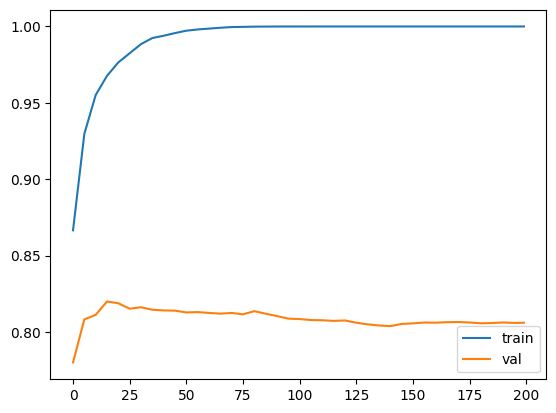

In [137]:
plt.plot(df_score.num_iter,df_score.train_auc,label='train')
plt.plot(df_score.num_iter,df_score.val_auc,label='val')
plt.legend()

## XGBoost Parameter Tuning

(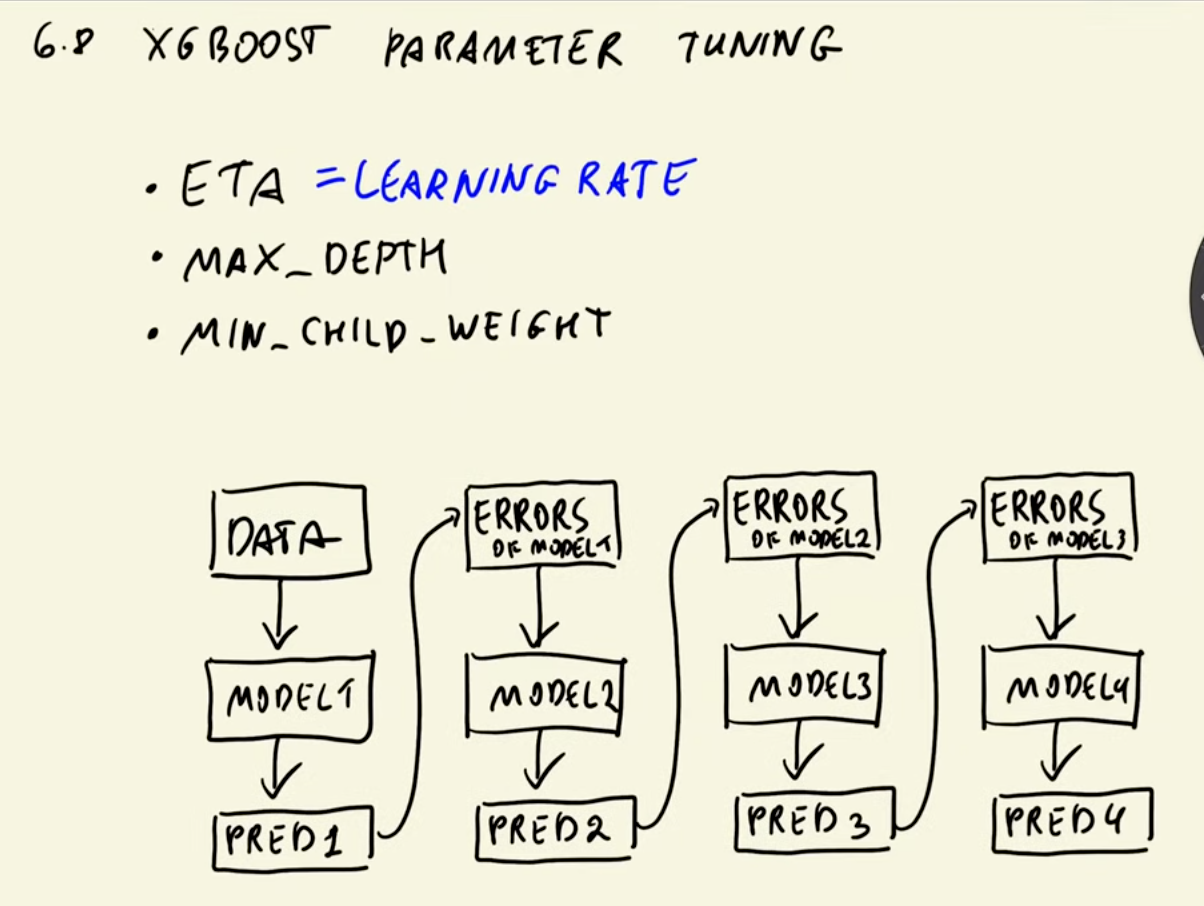)

In [138]:
scores = {}

In [181]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

In [182]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1', 'eta=0.1', 'eta=0.05', 'eta=0.01', 'max_depth=3', 'max_depth=6', 'max_depth=4'])

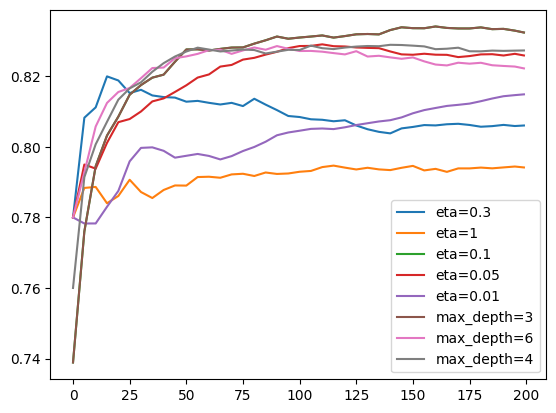

In [184]:

        
for key, df_score in scores.items():
    plt.plot(df_score.num_iter,df_score.val_auc,label=key)
plt.legend()

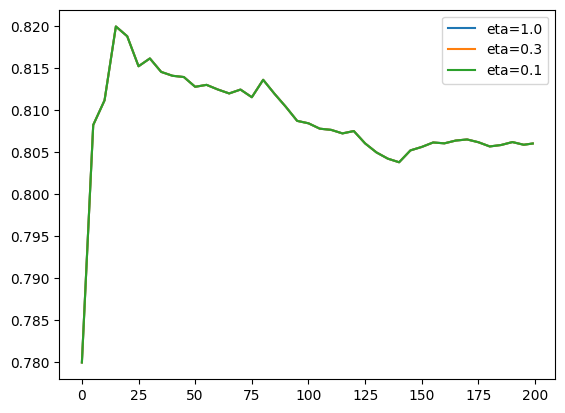

In [158]:
etas = ['eta=1.0','eta=0.3','eta=0.1']
for eta in etas:
    plt.plot(df_score.num_iter,df_score.val_auc,label=eta)
plt.legend()

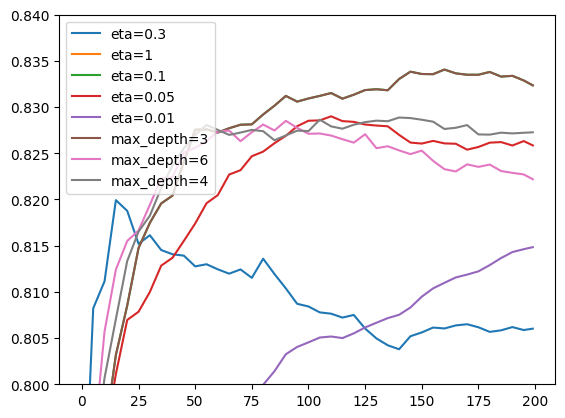

In [185]:
        
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter,df_score.val_auc,label=max_depth)
plt.ylim(0.8,0.84)
plt.legend()

## Selecting the Best Model

In [188]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [194]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.785470804775859

In [190]:
rf = RandomForestClassifier(n_estimators=200,
                           max_depth=10,min_samples_leaf=3,
                           random_state=1)
rf.fit(X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [195]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.8249709379767989

In [192]:
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1,
    
}
model = xgb.train(xgb_params,dtrain,num_boost_round=175)

In [196]:
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

0.8334715797631446

In [197]:
df_full_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3536,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
3866,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750


In [198]:
df_full_train.reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
1,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
2,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
4,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
3559,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
3560,ok,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3561,ok,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999


In [199]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [200]:
del df_full_train['status']

In [201]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [203]:
dfulltrain = xgb.DMatrix(X_full_train,label=y_full_train,feature_names=dv.get_feature_names_out().tolist())
dtest = xgb.DMatrix(X_test,feature_names=dv.get_feature_names_out().tolist())

In [204]:
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1,
    
}
model = xgb.train(xgb_params,dtrain,num_boost_round=175)

In [205]:
y_pred = model.predict(dtest)

In [206]:
roc_auc_score(y_test,y_pred)

0.8190765358486877